####  Diabetes classification using decision tree


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

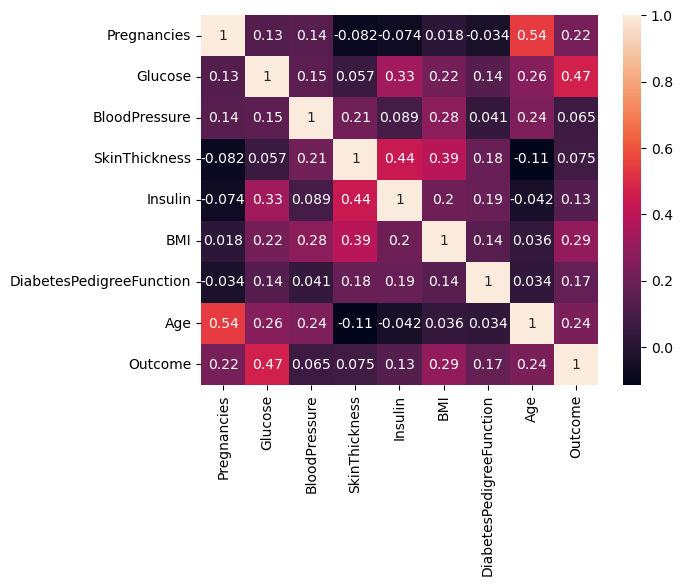

In [5]:
sns.heatmap(df.corr(),annot=True)

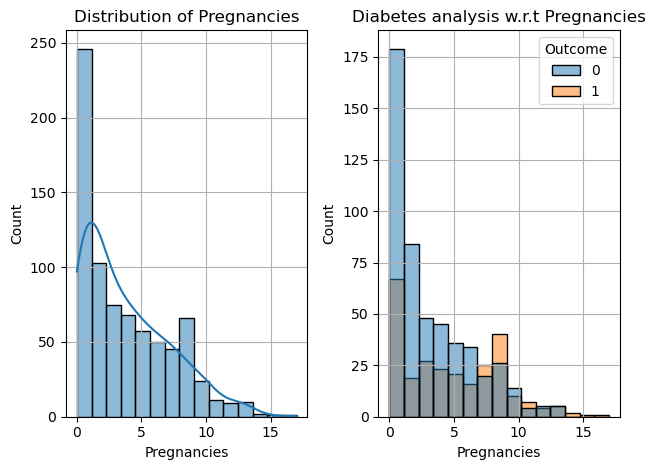

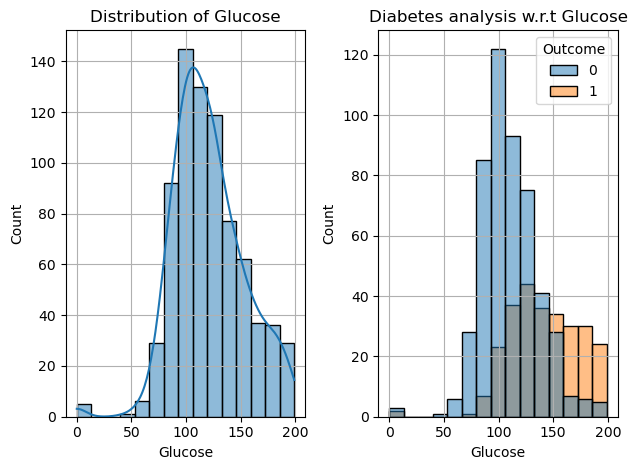

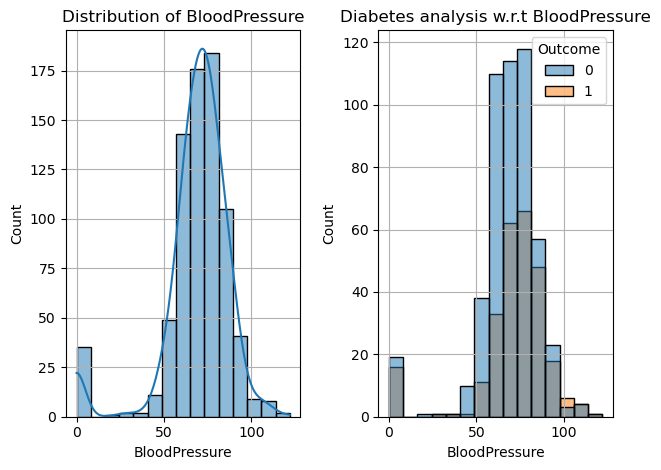

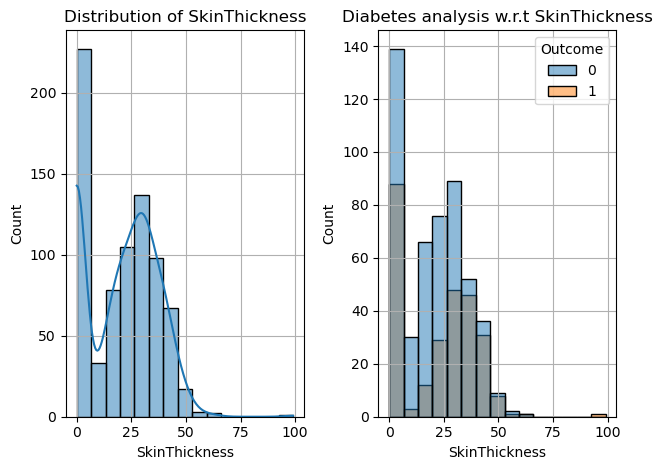

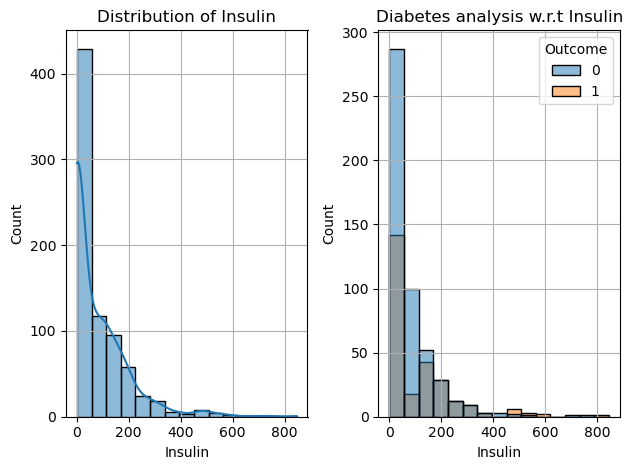

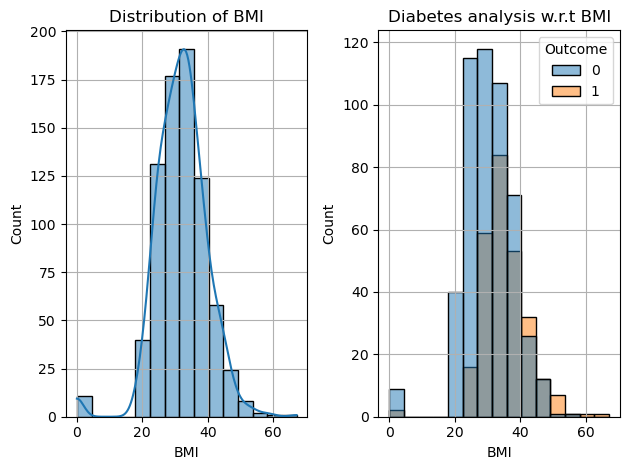

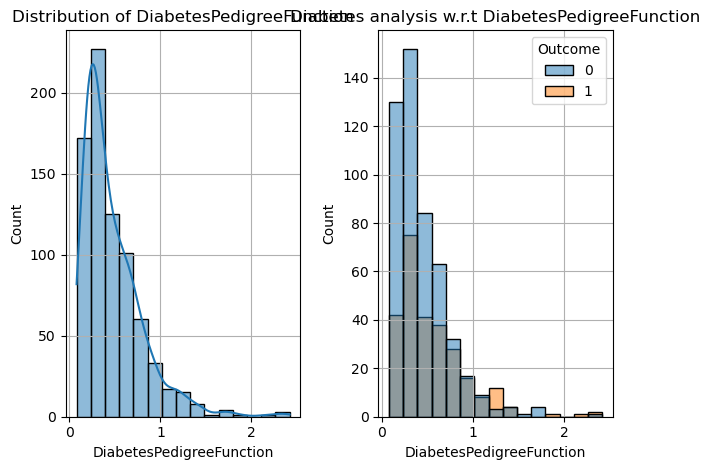

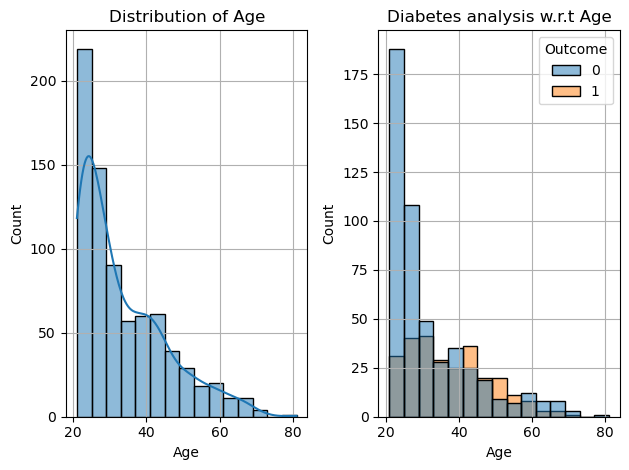

In [6]:
for feature in df.columns:
    if feature != 'Outcome':
        plt.subplot(1,2,1)
        sns.histplot(x=df[feature],kde=True,bins=15)
        plt.tight_layout()
        plt.title('Distribution of {}'.format(feature))
        plt.grid(True)
        plt.subplot(1,2,2)
        sns.histplot(x=df[feature],hue=df['Outcome'],bins=15)
        plt.tight_layout()
        plt.title('Diabetes analysis w.r.t {}'.format(feature))
        plt.grid(True)

        plt.show()

<Axes: >

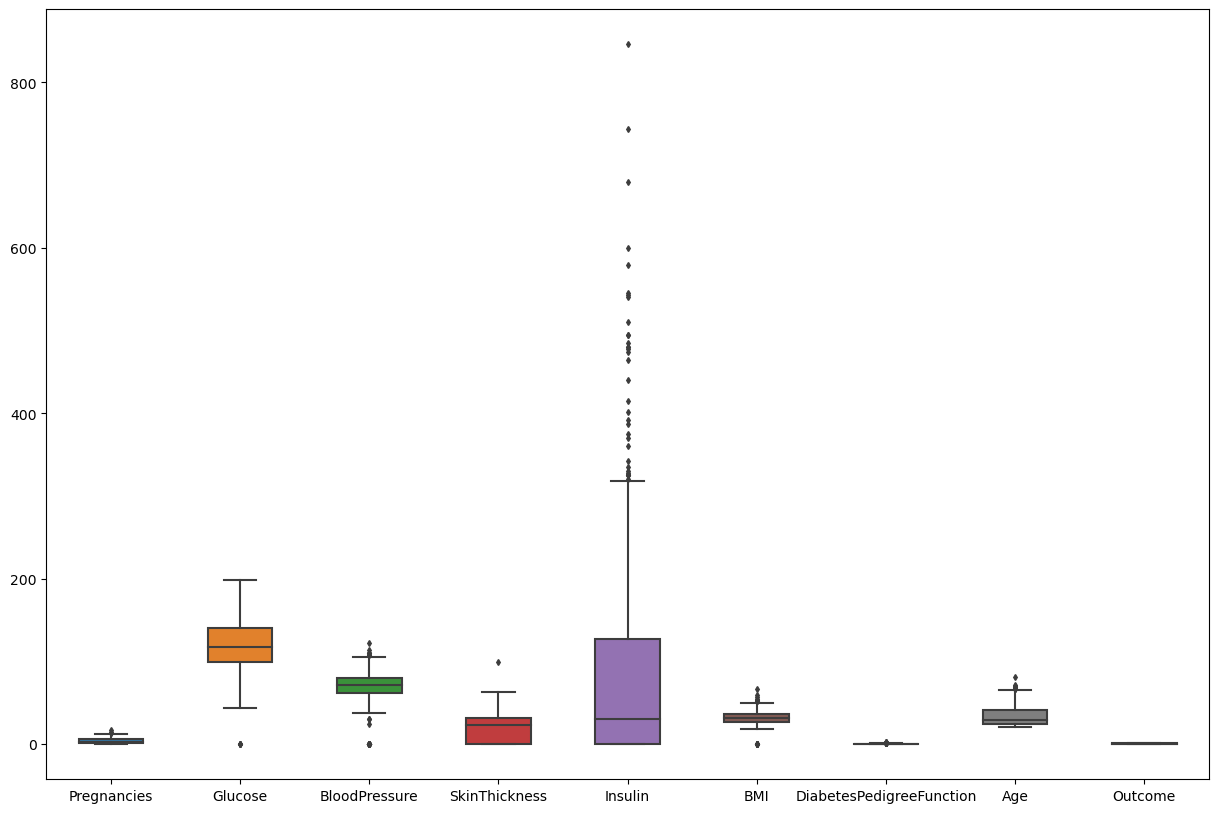

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

######  We observe that there are 0 values present in columns like Insulin, Blood Pressure, BMI, Glucose, SkinThickness which in reality is not possible therefore we impute these values with the the mean value of the feature. 

<Axes: >

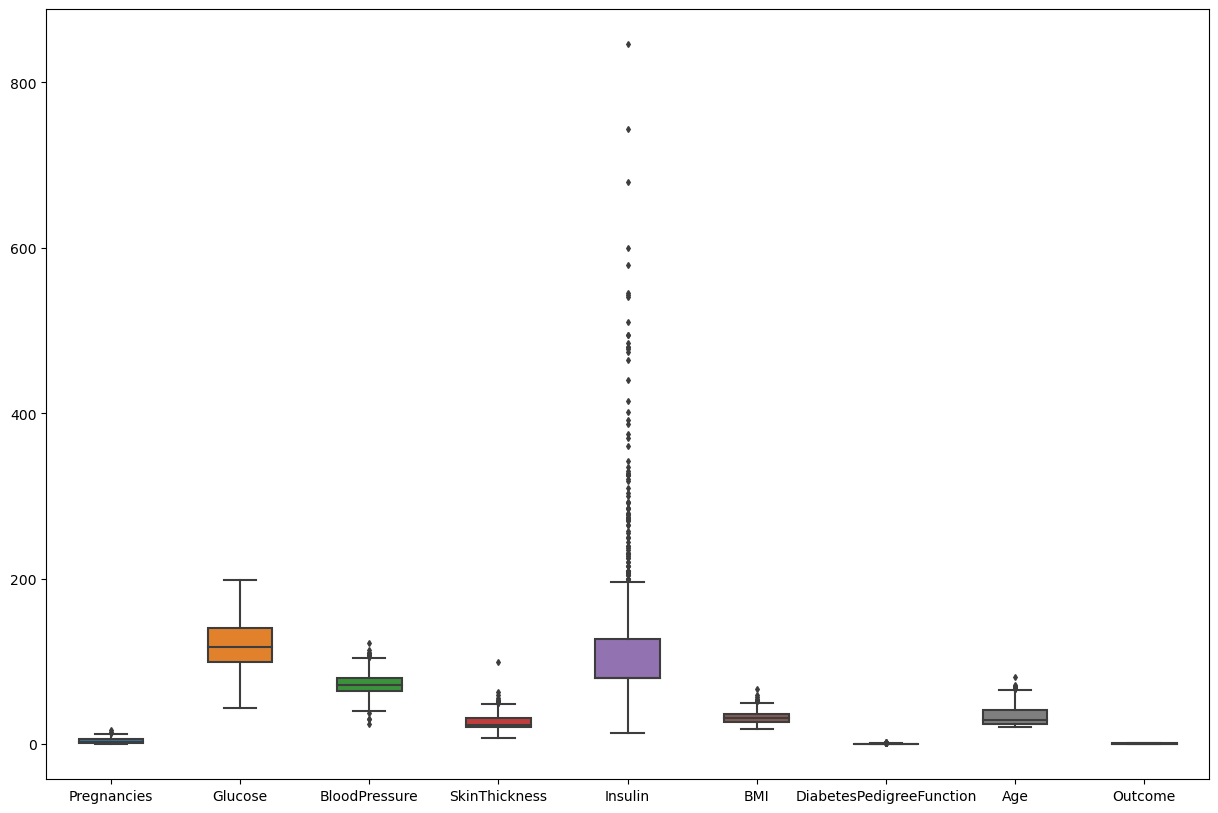

In [8]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [9]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# scaling the values using the standard scaler 
def standardScaling(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)
    
    return X_train_scaled,X_test_scaled

X_train_scaled,X_test_scaled=standardScaling(X_train,X_test)

X_train_scaled

array([[ 2.80346794,  0.24258793, -0.25110513, ...,  1.10366684,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.24258793,  1.14476384, ...,  0.40523314,
        -0.70087555, -0.86295593],
       [-0.22446668, -2.01997244,  0.81427371, ...,  0.30337823,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.68905457,  1.14476384, ...,  1.93305686,
         1.96850229,  0.44167036],
       [-1.13284707,  0.64186329, -0.25110513, ...,  1.46743439,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.10949615,  1.97098917, ..., -1.42815531,
        -0.6094383 , -1.03690611]])

[Text(0.566289645522388, 0.96875, 'x[1] <= 0.725\ngini = 0.452\nsamples = 576\nvalue = [377, 199]'),
 Text(0.2992459577114428, 0.90625, 'x[7] <= -0.385\ngini = 0.36\nsamples = 454\nvalue = [347, 107]'),
 Text(0.1828358208955224, 0.84375, 'x[1] <= 0.193\ngini = 0.208\nsamples = 246\nvalue = [217, 29]'),
 Text(0.09203980099502487, 0.78125, 'x[5] <= 2.442\ngini = 0.134\nsamples = 208\nvalue = [193, 15]'),
 Text(0.08208955223880597, 0.71875, 'x[5] <= -0.009\ngini = 0.118\nsamples = 206\nvalue = [193, 13]'),
 Text(0.029850746268656716, 0.65625, 'x[0] <= -0.376\ngini = 0.031\nsamples = 129\nvalue = [127, 2]'),
 Text(0.01990049751243781, 0.59375, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]'),
 Text(0.03980099502487562, 0.59375, 'x[4] <= -0.742\ngini = 0.117\nsamples = 32\nvalue = [30, 2]'),
 Text(0.01990049751243781, 0.53125, 'x[6] <= 0.252\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.009950248756218905, 0.46875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.029850746268656716, 0.

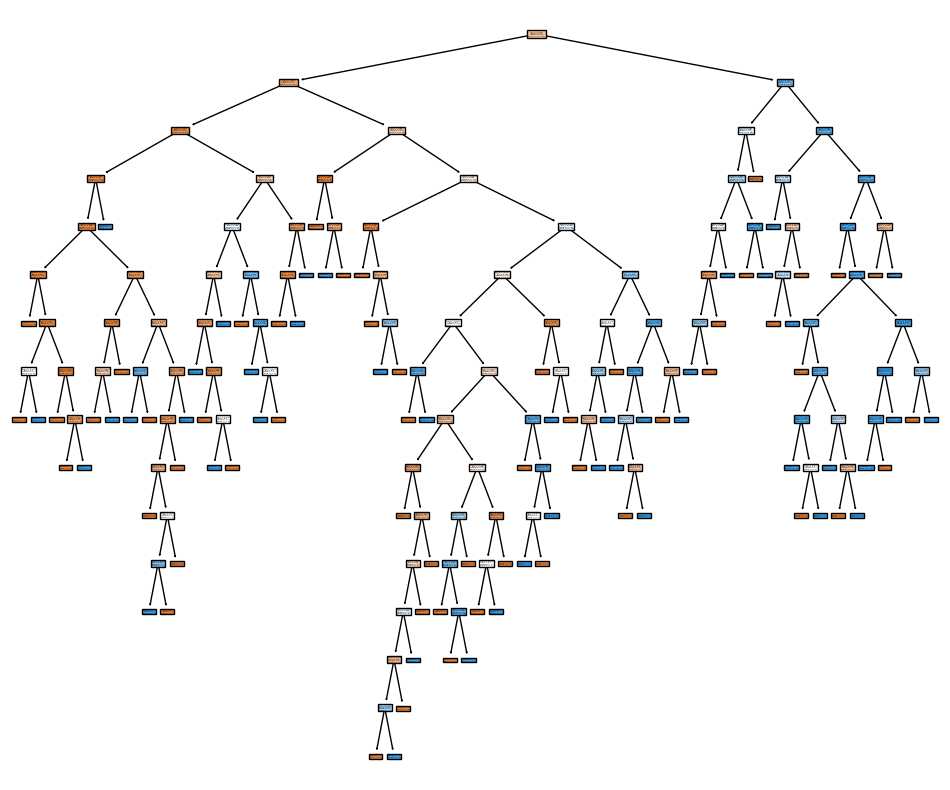

In [10]:
# let's plot the decision tree to visualize our splits 
from sklearn import tree
dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled,y_train)
plt.figure(figsize=(12,10))
tree.plot_tree(dt_classifier,filled=True)

#### Hyperparameter tuning to extract the best parameters for our model and using them for training purpose. Later we assess the performance of the model using various evaluation metrics

The best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.71875
Precision: 0.6153846153846154
Recall: 0.5797101449275363
F-1 Score: 0.5970149253731344


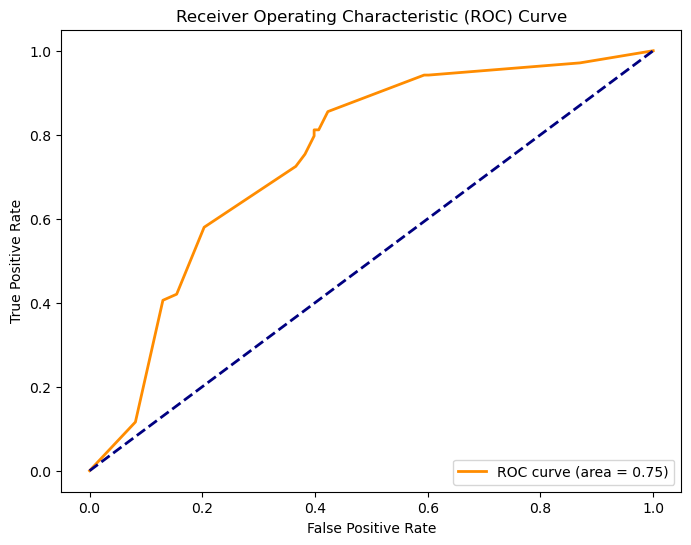

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid_cv=GridSearchCV(estimator=dt_classifier,param_grid=param_grid,cv=5,scoring='accuracy')
grid_cv.fit(X_train_scaled,y_train)

best_params=grid_cv.best_params_
print("The best hyperparameters:",best_params)
best_dt_model=grid_cv.best_estimator_

y_pred=best_dt_model.predict(X_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F-1 Score:",f1)

# ROC curve
y_proba = best_dt_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

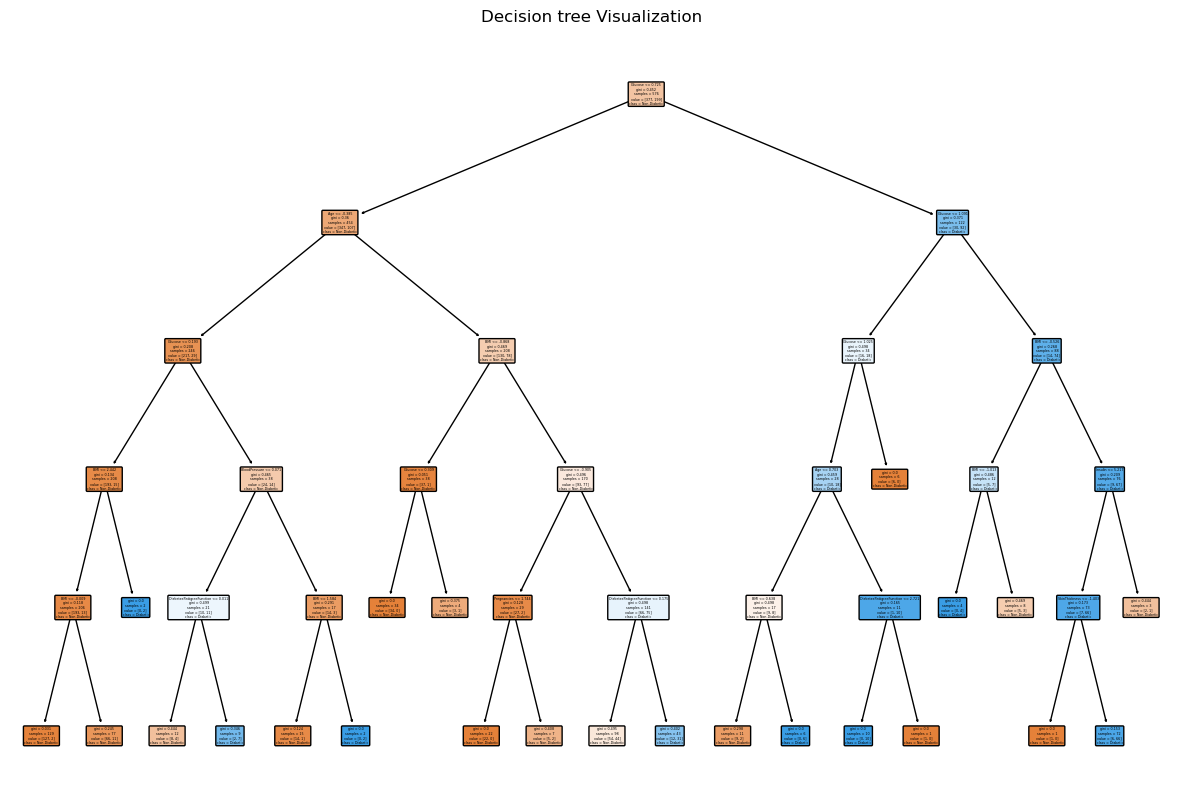

In [12]:
plt.figure(figsize=(15,10))
tree.plot_tree(best_dt_model,feature_names=X.columns,class_names=['Non-Diabetic','Diabetic'],filled=True,rounded=True)
plt.title('Decision tree Visualization')
plt.show()

In [13]:
feature_imp=best_dt_model.feature_importances_

feature_imp_df=pd.DataFrame({
    'Feature':X.columns,
    'Importance':feature_imp
})
feature_imp_df=feature_imp_df.sort_values(by='Importance',ascending=False)
print('Feature importances:')
print(feature_imp_df)

Feature importances:
                    Feature  Importance
1                   Glucose    0.557925
5                       BMI    0.207030
7                       Age    0.126697
6  DiabetesPedigreeFunction    0.059982
2             BloodPressure    0.016440
4                   Insulin    0.013617
3             SkinThickness    0.012021
0               Pregnancies    0.006288


##### we observe that glucose, BMI, and age have been marked as the most important features for predicting if a person is diabetic or not which makes sense as your glucose level determines a person's diabetes level and it is commonly observed that elder people are more prone to high diabetes levels.

In [14]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(best_dt_model,X,y,cv=5,scoring='accuracy')

print('Cross-Validation scores: ',cv_scores)
print('Mean cross-validation accuracy: ',cv_scores.mean())

Cross-Validation scores:  [0.74025974 0.68831169 0.77272727 0.78431373 0.74509804]
Mean cross-validation accuracy:  0.7461420932009167
